# 01. Prepare Problem

A content management company has hired you to analyze their users and want your help to gain insights on conversion rate from free user to paid user. They want to maximize their user base by targeting a discount offer for those users that usually leave.

Your job is to classify users to "Highly Likely" and "Unlikely".

## Question : 

Analyze the user's details and apply machine learning model to classify user into binary target(enrolled) 

> ### 1.1 Load Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('D:\\data\\MobileAppSubscription')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dateutil import parser

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

> ### 1.2 Load Data

In [2]:
data = pd.read_csv('appdata10.csv')

# 02. Summarize Data

In [3]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


**Lets convert data in their actual format**

In [6]:
# first way - converting date from string format to date format
data.enrolled_date = [parser.parse(row) if isinstance(row,str) else row for row in data.enrolled_date]

In [7]:
# second way - converting date from string format to date format
data.first_open = pd.to_datetime(data.first_open)

In [8]:
#data.hour = data.hour.str.slice(1,3).astype('int')                     # first way
data.hour = data.hour.str.split(':',expand=True)[0].astype('int')       # second way

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [10]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [11]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# 03. Visualize Data

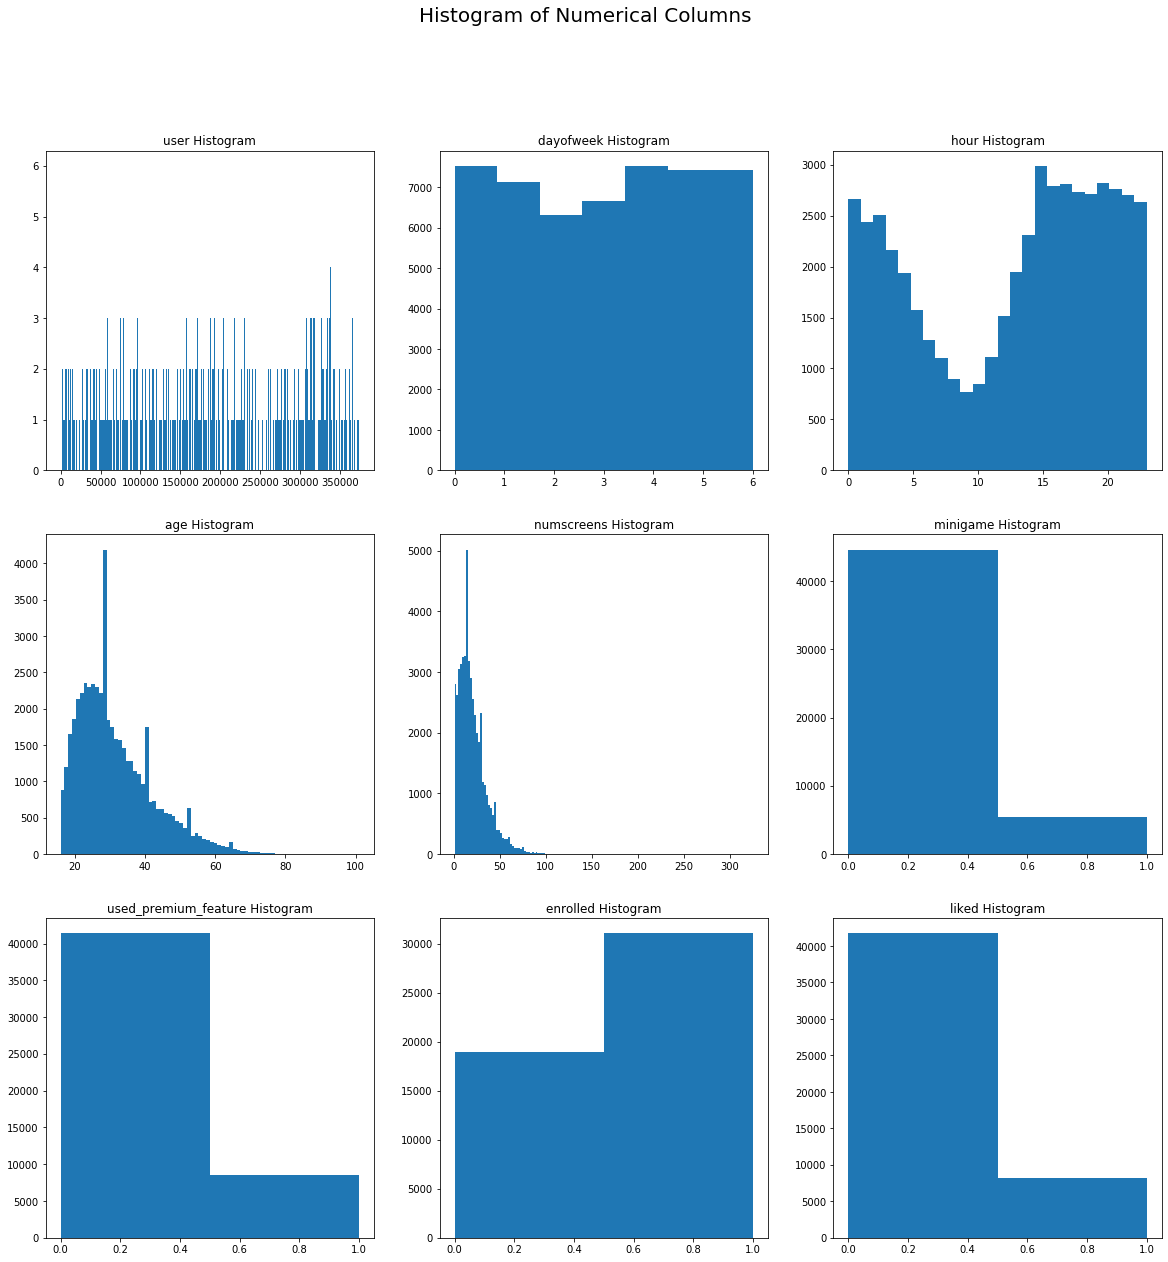

In [12]:
plt.rcParams['figure.figsize']=(20,20)
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
counter = 1
for i in data.select_dtypes(exclude=['object','datetime']).columns:
    plt.subplot(3, 3, counter)
    f = plt.gca()
    f.set_title(i+' Histogram')
    
    vals = data[i].nunique()
    
    plt.hist(data[i], bins=vals)
    counter+=1

> ### 3.3 Feature Engineering

>> #### 3.3.1 Tuning Response variable

**Aim:** Lets find the difference in HOUR for a user to enroll himself as a premium member 

In [12]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [13]:
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')

In [14]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [15]:
data = data.drop(columns=['user','first_open','enrolled_date']) # lets get rid of obsolete feature

**Question:** What is the best hour to select as a cutoff time for response variable?

Text(0.5, 1.0, 'Distribution of time-sense to sense enrollment')

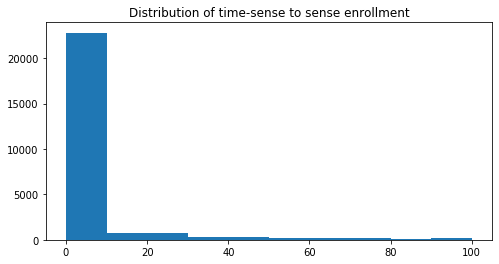

In [16]:
plt.rcParams['figure.figsize']=(8,4)
plt.hist(data.difference.dropna(),range=[0,100]) # plot only first 100 hour
plt.title('Distribution of time-sense to sense enrollment')

**Answer:** Lets select 48(2 days) as a cutoff

In [17]:
(data.loc[data.difference>48,['difference','enrolled']])

,difference,enrolled
8,920.0,1
13,570.0,1
15,2066.0,1
17,196.0,1
27,767.0,1
...,...,...
49951,255.0,1
49952,3010.0,1
49982,2075.0,1
49983,2016.0,1


In [18]:
(data.loc[data.difference>48,'enrolled']).value_counts()

1    6224
Name: enrolled, dtype: int64

**Aim :** Company wants to give only 48 hours of free usage for app, we are going neglact all those users that have enrolled after 48 hours

In [19]:
data.loc[data.difference > 48,'enrolled'] = 0 # we assume every person who have spend GT 48 hours without enrollment as Not enrolled

In [20]:
del data['difference'] # get rid of unused feature

>> #### 3.3.2 Engineering Screen_List a user have visited

In [21]:
# Lets count the number of screen per row
tmp = []
for i in range(0,data.shape[0]):
    tmp.append(data.screen_list[i].count(','))

In [22]:
pd.DataFrame(tmp).sort_values(by=0,ascending=False).head()

,0
27660,78
22975,63
47678,61
18481,52
4884,52


So if we go ahead for OneHot Encoding, we will end up adding 78 columns more to our data to replace ScreenList feature. This is not a primary option for us.

What other option do we have? Lets only encode the top screens :)

In [23]:
top_screen = pd.read_csv('top_screens.csv')['top_screens'].values

In [24]:
top_screen   # So these are the top screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [25]:
data.screen_list = data.screen_list.astype('str')+','  # lets append a ',' to each screen_list row so that ',' represent count

In [26]:
for val in top_screen:
    data[val] = data.screen_list.str.contains(val).astype('int') # create a binary column for top screen in actual data
    data.screen_list = data.screen_list.str.replace(val+',','') # replace value in screen_list marking it is considered

In [27]:
data.head()

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,19,23,,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Now what to do with other screens in screen_list? lets encode it to its count that denote users activity within a app

In [28]:
data['other'] = data.screen_list.str.count(',')

In [29]:
del data['screen_list']

In [30]:
pd.set_option('display.max_columns',500)
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,3,2,23,15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,1,18,31,32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


Can we reduce the dimension of data further? Yes by applying a domain/project knowledge

How? We can just group the columns by their categories i.e. All screens that belong to one functionality can be summed to represent a feature

In [31]:
data.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendToken', 'Tr

In [32]:
saving_screen = [i for i in data.columns if 'Saving' in i]

In [33]:
credit_screen = [i for i in data.columns if 'Credit' in i]

In [34]:
loan_screen = [i for i in data.columns if 'Loan' in i]

In [35]:
cc_screen = [i for i in data.columns if 'CC' in i]

Now lets sum the values of these categories and delete their actual columns

In [36]:
data.shape

(50000, 67)

In [37]:
# sum
data['Saving'] = data[saving_screen].sum(axis=1)
data['Credit'] = data[credit_screen].sum(axis=1)
data['Loan'] = data[loan_screen].sum(axis=1)
data['CC'] = data[cc_screen].sum(axis=1)

# delete
data = data.drop(columns=saving_screen+credit_screen+loan_screen+cc_screen)

In [38]:
data.shape

(50000, 48)

In [39]:
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,Saving,Credit,CC
0,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0
1,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
2,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0
4,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0


In [40]:
data.to_csv('newdata.csv',index=False) # lets save our hard work

> ### 3.4 Data Preprocessing

In [2]:
data = pd.read_csv('newdata.csv')

In [3]:
target = data.enrolled  # saving target variable
del data['enrolled'] # drop target variable from data

In [4]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=0)

> ### 3.5 Scaling

In [5]:
feature_list = x_train.columns

In [6]:
ss = StandardScaler()

In [7]:
# Scaling
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [8]:
# Converting back to frame with column names
x_train = pd.DataFrame(x_train,columns=feature_list)
x_test = pd.DataFrame(x_test,columns=feature_list)

> ### 3.6 Feature Selection

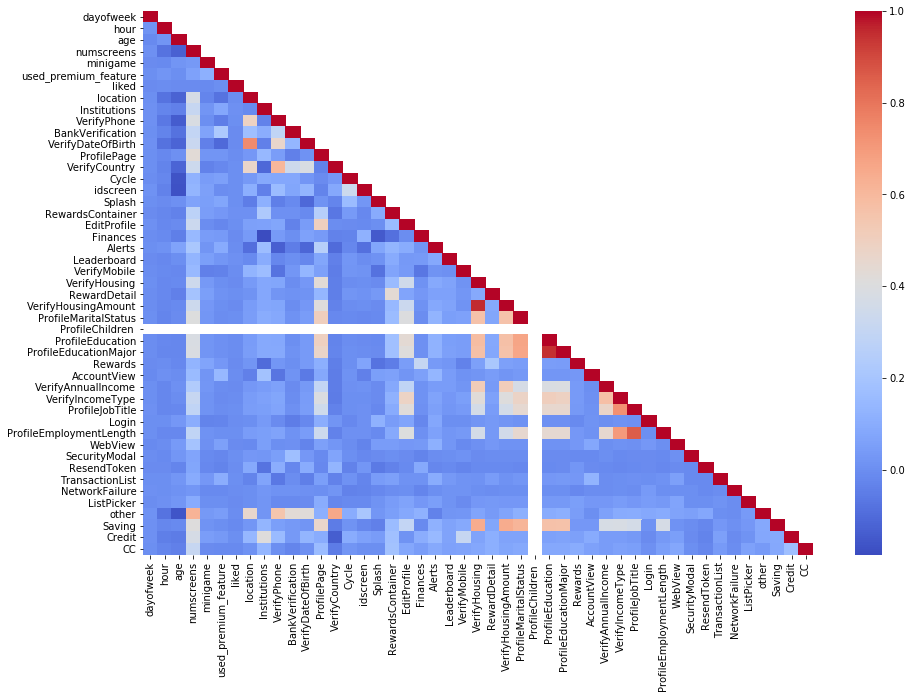

In [9]:
plt.rcParams['figure.figsize']=(15,10)
cor = x_train.corr()
sns.heatmap(cor,mask=np.triu(np.ones_like(cor),k=1),cmap='coolwarm')

# 04. Evaluate Algorithms

> ### 4.1 Linear Algorithms

In [11]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron

In [55]:
algo_list = []

algo_list.append(('LogisticRegression',LogisticRegression()))
algo_list.append(('PassiveAggressiveClassifier',PassiveAggressiveClassifier()))
algo_list.append(('RidgeClassifierCV',RidgeClassifierCV()))
algo_list.append(('SGDClassifier',SGDClassifier()))
algo_list.append(('Perceptron',Perceptron()))

In [59]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.763725 (0.004837)
PassiveAggressiveClassifier: 0.648600 (0.064085)
RidgeClassifierCV: 0.763575 (0.004475)
SGDClassifier: 0.745500 (0.004423)
Perceptron: 0.686525 (0.027887)


> ### 4.2 Non Linear Algorithm

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [13]:
algo_list = []

algo_list.append(('KNeighborsClassifier',KNeighborsClassifier()))
#algo_list.append(('SVC',SVC()))
#algo_list.append(('NuSVC',NuSVC()))
algo_list.append(('GaussianNB',GaussianNB()))
algo_list.append(('BernoulliNB',BernoulliNB()))
algo_list.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
algo_list.append(('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis()))

In [14]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNeighborsClassifier: 0.731675 (0.003992)
GaussianNB: 0.712325 (0.006066)
BernoulliNB: 0.722000 (0.007402)
LinearDiscriminantAnalysis: 0.763600 (0.004500)
QuadraticDiscriminantAnalysis: 0.700475 (0.014779)


> ### 4.3 Tree Algorithm

In [15]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

In [16]:
algo_list = []

algo_list.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
algo_list.append(('ExtraTreeClassifier',ExtraTreeClassifier()))

In [17]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DecisionTreeClassifier: 0.690650 (0.005841)
ExtraTreeClassifier: 0.688900 (0.005849)


> ### 4.4 Ensemble Algorithm

In [21]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
algo_list = []

algo_list.append(('RandomForestClassifier',RandomForestClassifier()))
algo_list.append(('AdaBoostClassifier',AdaBoostClassifier()))
algo_list.append(('BaggingClassifier',BaggingClassifier()))
algo_list.append(('ExtraTreesClassifier',ExtraTreesClassifier()))
algo_list.append(('GradientBoostingClassifier',GradientBoostingClassifier()))

In [23]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy'
for name, model in algo_list:
    kfold = KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RandomForestClassifier: 0.777725 (0.006698)
AdaBoostClassifier: 0.762850 (0.004252)
BaggingClassifier: 0.749750 (0.007259)
ExtraTreesClassifier: 0.767075 (0.005205)
GradientBoostingClassifier: 0.776625 (0.006442)


> ### 4.5 Voting

In [33]:
from sklearn.ensemble import VotingClassifier

In [27]:
# Selecting only those algo that yield high accuracy
voter = VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier()),
                                     ('LogisticRegression', LogisticRegression())
                                    ],voting='hard')

In [30]:
# Hard Voting
for name, model in zip(['RandomForestClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'HardVoting'],
                       [RandomForestClassifier(), GradientBoostingClassifier(), LogisticRegression(), voter]):
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), name))

Accuracy: 0.78 (+/- 0.00) [RandomForestClassifier]
Accuracy: 0.78 (+/- 0.00) [GradientBoostingClassifier]
Accuracy: 0.76 (+/- 0.00) [LogisticRegression]
Accuracy: 0.78 (+/- 0.00) [Ensemble]


In [31]:
# Soft Voting
voter = VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier()),
                                     ('LogisticRegression', LogisticRegression())
                                    ],voting='soft',weights=[0.3,0.3,0.4]
                        )

In [32]:
for name, model in zip(['SoftVoting'],
                       [voter]):
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), name))

Accuracy: 0.78 (+/- 0.00) [Ensemble]


> ### 4.6 Stacking

In [34]:
from sklearn.ensemble import StackingClassifier

In [35]:
stack = StackingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier()),
                                     ('GradientBoostingClassifier', GradientBoostingClassifier())
                                      ],final_estimator=LogisticRegression()
                          )

In [36]:
scores = cross_val_score(stack, x_train, y_train, scoring='accuracy', cv=5)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Stacking'))

Accuracy: 0.78 (+/- 0.00) [Stacking]


Looks like Voting and Stacking is not helping out here. So to keep our model simple as well as powerfull, let choose RandomForestClassifier.

# 05. Imporve Model

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 5)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 22, 35, 47, 60],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [50]:
classifier = RandomForestClassifier()

In [52]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = classifier, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [53]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 22,
 'bootstrap': False}

In [55]:
random_search.best_score_

0.7818250109770069

there is increament of 0.004 with help of hyper tuning

# 06. Finalize Model

In [59]:
classifier = RandomForestClassifier(n_estimators=200,
                                   min_samples_split=10,
                                   min_samples_leaf=4,
                                   max_features='sqrt',
                                   max_depth=22,
                                   bootstrap=False)

In [61]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=22, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
ypred = classifier.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
confusion_matrix(y_test,ypred)

array([[4139,  933],
       [1226, 3702]], dtype=int64)

In [66]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5072
           1       0.80      0.75      0.77      4928

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



**Conclusion :**
Of all customer who are leaving the application, 75% of such users are identified by our model. 
This performance is much better i.e. 82% for non-leaving customer. So we can save cost by limiting our offers to such users.